## Training with TPrime_600GeV_&_ttgg_As_ background
>This is the training of signal and bacgrund to get the output as a HDF5 file. The output file futher used to test on the TPrime at 1200GeV as signal.


Here, The input files are Signal with Tprime and background file used here are ttgg. Both have been used with the same number of input varaibles.'dipho_pt','dipho_phi', 'dipho_eta','dipho_e','dipho_mass','dipho_leadPt', 'dipho_leadEt','dipho_leadEta','dipho_leadPhi', 'dipho_subleadEta','bjet1_pt','bjet2_pt','bjet1_eta', 'bjet2_eta', 'jet1_pt','jet2_pt', 'jet1_eta', 'n_jets', 'n_bjets', 'bjet2_phi', 'bjet3_phi', 'bjet1_discr','bjet2_discr', 'bjet3_discr', 'jet3_pt', 'jet3_phi', 'jet1_e', 'jet2_e', 'jet3_e'.

In [77]:
import pandas as pd
import numpy as np
import math
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.optimizers import adam, adadelta, adagrad

sns.set(color_codes = True)
sns.set_palette(sns.color_palette("muted"))

from itertools import tee, islice
from ROOT import TFile, TCanvas, TPad, TPaveLabel, TPaveText, TTree, TH1F, TF1
from root_numpy import root2array, tree2array, array2tree, array2root
import sys
from ROOT import gROOT, AddressOf
from root_numpy import root2array, rec2array
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.ticker as ticker
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree

## Import the datasets

>Import all the signal and the backgrounds 
 * Signals 
     signal_TPrime_600 = /eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-600_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root
        

In [2]:
signal = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_TprimeBToTH_Hgg_M-600_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
back_1 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8.root'
back_01= '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_ttHJetToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8.root'
back_02 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_VBFHToGG_M125_13TeV_amcatnlo_pythia8.root'
back_03 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8.root'
back_04 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_THQ_ctcvcp_HToGG_M125_13TeV-madgraph-pythia8.root'
back_05= '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8.root'

In [3]:
treeName_back_1 ="tagsDumper/trees/ttgg_13TeV_THQLeptonicTag" 
treeName_signal = "tagsDumper/trees/Tprime_600_13TeV_THQLeptonicTag"
treeName_back_05 = "tagsDumper/trees/ggh_125_13TeV_THQLeptonicTag"
treeName_back_04 = "tagsDumper/trees/thq_125_13TeV_THQLeptonicTag"
treeName_back_03 = "tagsDumper/trees/vh_125_13TeV_THQLeptonicTag"
treeName_back_02 = 'tagsDumper/trees/vbf_125_13TeV_THQLeptonicTag'
treeName_back_01 = "tagsDumper/trees/tth_125_13TeV_THQLeptonicTag"


In [4]:
columns = ['dipho_pt', 
           'dipho_phi',
           'dipho_eta',
           'dipho_e',
           'dipho_mass',
           'dipho_leadPt',
           'dipho_leadEt',
           'dipho_leadEta',
           'dipho_leadPhi',
           'dipho_subleadEta',
           'bjet1_pt',
           'bjet2_pt',
           'bjet1_eta',
           'bjet2_eta',
           'jet1_pt',
           'jet2_pt',
           'jet1_eta',
           'n_jets',
           'n_bjets',
           'bjet2_phi',
           'bjet3_phi',
           'bjet3_eta',
           'bjet1_discr',
           'bjet2_discr',
           'bjet3_discr',
           'jet3_pt',
#           'jet1_phi',
#          'jet2_phi' ,
          'jet3_phi',
          'jet1_e',
          'jet2_e',
          'jet3_e',
#            'CMS_hgg_mass',
#             'sigmaMoM_decorr',
#             'dipho_sumpt',
#             'dipho_cosphi',
# #             'dipho_mass',
#             'dipho_lead_ptoM',
#             'ele1_pt',
#             'ele2_pt',
#             'ele1_eta',
#             'ele2_eta',
#             'ele1_phi',
#             'ele2_phi',
#             'ele1_e',
#             'ele2_e',
#             'ele1_ch',
#             'ele2_ch',
          ]

In [5]:
signal_Tprime600 = root2array(signal, treeName_signal, columns)   #Signal TPrime at 600TeV
back_ttgg = root2array(back_1, treeName_back_1, columns)     # ttgg background(Not using this)
back_tth = root2array(back_01, treeName_back_01, columns)      
back_vbf = root2array(back_02, treeName_back_02, columns)
back_vh = root2array(back_03, treeName_back_03, columns)
back_thq = root2array(back_04, treeName_back_04, columns)
back_ggh = root2array(back_05, treeName_back_05, columns)


In [6]:
signal_Tprime600 = pd.DataFrame(signal_Tprime600)            #Signal for the testing
back_tth = pd.DataFrame(back_tth)          #tth background dataframe 
back_vbf = pd.DataFrame(back_vbf)             #vbf background dataframe 
back_vh = pd.DataFrame(back_vh)             #vh background dataframe 
back_thq = pd.DataFrame(back_thq) #thq background dataframe 
back_ggh = pd.DataFrame(back_ggh) #ggh background dataframe 
back_ttgg = pd.DataFrame(back_ttgg)

In [7]:
signal_Tprime600.head()

,dipho_pt,dipho_phi,dipho_eta,dipho_e,dipho_mass,dipho_leadPt,dipho_leadEt,dipho_leadEta,dipho_leadPhi,dipho_subleadEta,...,bjet3_phi,bjet3_eta,bjet1_discr,bjet2_discr,bjet3_discr,jet3_pt,jet3_phi,jet1_e,jet2_e,jet3_e
0,223.705856,-1.323450,0.318467,267.080170,126.641273,199.472260,199.472260,0.084015,-1.190372,1.195149,...,-999.0,-999.0,0.542797,-999.0,-999.0,32.669273,1.569978,95.607208,1191.367432,241.569809
1,260.774780,-0.267662,-0.128844,290.720459,124.014992,217.392303,217.392303,-0.121357,-0.029141,-0.101361,...,-999.0,-999.0,0.638937,-999.0,-999.0,-999.000000,-999.000000,118.092453,414.571472,-999.000000
2,161.275345,1.180603,1.236659,325.605042,123.836288,121.089691,121.089691,0.842742,0.717829,1.373165,...,-999.0,-999.0,0.190941,-999.0,-999.0,38.143219,-0.088661,1073.277710,710.365112,1559.091675
3,180.834686,2.346533,0.262894,223.509109,122.239555,158.326920,158.326920,0.202652,2.675919,0.260665,...,-999.0,-999.0,0.991427,-999.0,-999.0,-999.000000,-999.000000,147.974121,743.884460,-999.000000
4,120.654503,1.938972,0.362926,178.034470,123.026970,139.716736,139.716736,0.194240,1.749266,0.534833,...,-999.0,-999.0,0.998264,-999.0,-999.0,27.921988,-0.433156,181.441132,170.393524,157.808121


In [8]:



signal_Tprime600.shape

(81013, 30)

In [9]:
len(signal_Tprime600)

81013

In [10]:
signal_Tprime600.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81013 entries, 0 to 81012
Data columns (total 30 columns):
dipho_pt            81013 non-null float32
dipho_phi           81013 non-null float32
dipho_eta           81013 non-null float32
dipho_e             81013 non-null float32
dipho_mass          81013 non-null float32
dipho_leadPt        81013 non-null float32
dipho_leadEt        81013 non-null float32
dipho_leadEta       81013 non-null float32
dipho_leadPhi       81013 non-null float32
dipho_subleadEta    81013 non-null float32
bjet1_pt            81013 non-null float32
bjet2_pt            81013 non-null float32
bjet1_eta           81013 non-null float32
bjet2_eta           81013 non-null float32
jet1_pt             81013 non-null float32
jet2_pt             81013 non-null float32
jet1_eta            81013 non-null float32
n_jets              81013 non-null float32
n_bjets             81013 non-null float32
bjet2_phi           81013 non-null float32
bjet3_phi           81013 non-n

In [11]:
assert signal_Tprime600.isnull().sum().sum() == 0

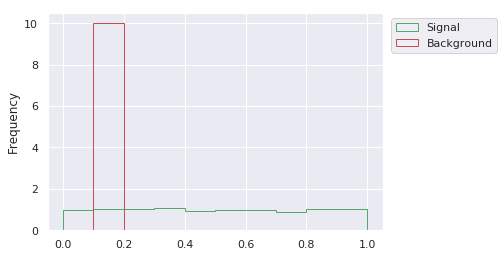

In [12]:
low_high=(0,1)
signal_Tprime600['bjet3_phi'].plot.hist( alpha = 1, fill= False,
                                        histtype = 'step', edgecolor = 'g', density=True, range=low_high, label = 'Signal')
back_ggh['bjet3_phi'].plot.hist( alpha = 1, fill= False,
                                        histtype = 'step', edgecolor = 'r', density=True, range=low_high, label = 'Background')
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")
plt.show()


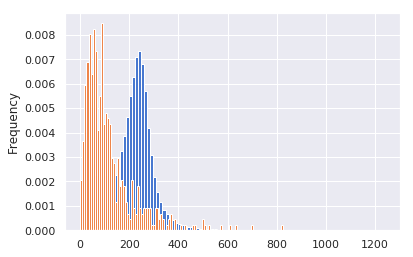

In [13]:
signal_Tprime600['dipho_pt'].plot.hist(bins=100, density = True)
back_ggh['dipho_pt'].plot.hist(bins=100, density = True)

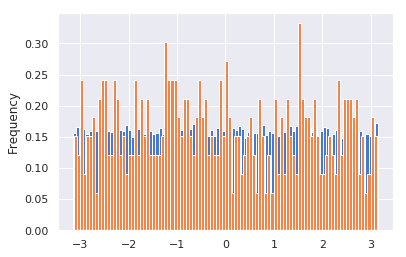

In [14]:
signal_Tprime600['dipho_phi'].plot.hist(bins=100, density = True)
back_ggh['dipho_phi'].plot.hist(bins=100, density = True)

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


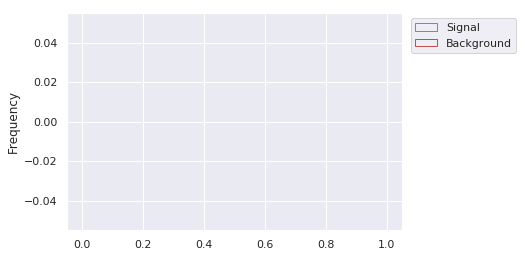

In [15]:
low_high=(0,1)
signal_Tprime600['jet3_pt'].plot.hist( alpha = 1, fill= False,
                                        histtype = 'step', edgecolor = 'g', density=True, range=low_high, label = 'Signal')
back_ggh['jet3_pt'].plot.hist( alpha = 1, fill= False,
                                        histtype = 'step', edgecolor = 'r', density=True, range=low_high, label = 'Background')
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")
plt.show()


In [16]:
signal = signal_Tprime600
backgr = pd.concat((back_tth, back_ggh, back_vbf, back_vh, back_ttgg), axis=0)

In [17]:
X = np.concatenate((signal_Tprime600, backgr))
y = np.concatenate((np.ones(signal_Tprime600.shape[0]),
                    np.zeros(backgr.shape[0])))

In [18]:
X.shape, y.shape

((239154, 30), (239154,))

In [19]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state =5)


In [20]:
X_train.shape, y_train.shape

((160233, 30), (160233,))

In [21]:
X_test.shape, y_test.shape

((78921, 30), (78921,))

In [22]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils.vis_utils import plot_model
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adadelta
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import RandomNormal, Constant

In [27]:
clf = Sequential()
# clf.add(LSTM(1, return_sequences=True ))
clf.add(BatchNormalization(input_shape = (30,)))
# clf.add(Dropout(3))
clf.add(Dense(256, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform',name = 'dense_1'))
clf.add(BatchNormalization())
clf.add(Dropout(0.3))
clf.add(Dense(256, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_2'))
clf.add(Dropout(0.3))
clf.add(Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_3'))
clf.add(BatchNormalization())
clf.add(Dropout(0.3))
clf.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform',name = 'dense_4'))
clf.add(BatchNormalization())
clf.add(Dropout(0.3))
clf.add(Dense(32, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_5'))
clf.add(BatchNormalization(momentum=0.99,epsilon=0.001,beta_initializer=RandomNormal(mean=0.0, stddev=0.05),gamma_initializer=Constant(value=0.9)))

# Output
clf.add(Dense(1, activation = 'sigmoid',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'output'))
#compile model

# opt = SGD(lr=0.01, momentum=0.9)
clf.compile(loss = 'binary_crossentropy', 
            optimizer= 'adam',
            metrics=['accuracy'])
print('Summary of the built model...')
print(clf.summary())
# plot_model(clf, to_file='/eos/home-s/sraj/M.Sc._Thesis/Plot/''clf_plot_multiclass___.png', show_shapes=True, show_layer_names=True)

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_20 (Batc (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               7936      
_________________________________________________________________
batch_normalization_21 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)      

In [28]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', verbose=1, patience =  10, mode = "auto", baseline = None)
# fit model
history = clf.fit(X_train, y_train, validation_split = 0.30, batch_size= 9000, epochs=100, verbose=1)
# evaluate the model

Train on 112163 samples, validate on 48070 samples
Epoch 1/100
112163/112163 [==============================] - 5s 49us/step - loss: 1.3145 - acc: 0.6998 - val_loss: 1.1338 - val_acc: 0.8117
Epoch 2/100
112163/112163 [==============================] - 2s 16us/step - loss: 1.1349 - acc: 0.8045 - val_loss: 1.0590 - val_acc: 0.8375
Epoch 3/100
112163/112163 [==============================] - 2s 16us/step - loss: 1.0391 - acc: 0.8291 - val_loss: 0.9744 - val_acc: 0.8482
Epoch 4/100
112163/112163 [==============================] - 2s 16us/step - loss: 0.9587 - acc: 0.8376 - val_loss: 0.8909 - val_acc: 0.8535
Epoch 5/100
112163/112163 [==============================] - 2s 17us/step - loss: 0.8871 - acc: 0.8438 - val_loss: 0.8241 - val_acc: 0.8560
Epoch 6/100
112163/112163 [==============================] - 2s 17us/step - loss: 0.8219 - acc: 0.8474 - val_loss: 0.7639 - val_acc: 0.8575
Epoch 7/100
112163/112163 [==============================] - 2s 15us/step - loss: 0.7665 - acc: 0.8490 - val_

Epoch 59/100
112163/112163 [==============================] - 2s 19us/step - loss: 0.3043 - acc: 0.8738 - val_loss: 0.3176 - val_acc: 0.8701
Epoch 60/100
112163/112163 [==============================] - 2s 17us/step - loss: 0.3040 - acc: 0.8752 - val_loss: 0.3208 - val_acc: 0.8707
Epoch 61/100
112163/112163 [==============================] - 2s 20us/step - loss: 0.3040 - acc: 0.8745 - val_loss: 0.3179 - val_acc: 0.8698
Epoch 62/100
112163/112163 [==============================] - 2s 19us/step - loss: 0.3025 - acc: 0.8750 - val_loss: 0.3185 - val_acc: 0.8709
Epoch 63/100
112163/112163 [==============================] - 2s 17us/step - loss: 0.3031 - acc: 0.8751 - val_loss: 0.3146 - val_acc: 0.8710
Epoch 64/100
112163/112163 [==============================] - 2s 18us/step - loss: 0.3019 - acc: 0.8745 - val_loss: 0.3181 - val_acc: 0.8701
Epoch 65/100
112163/112163 [==============================] - 2s 16us/step - loss: 0.3022 - acc: 0.8749 - val_loss: 0.3157 - val_acc: 0.8707
Epoch 66/100


2022-02-22 19:10:04.769906: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


In [29]:
# Final evaluation of the model for DNN
# Testing Outputs"$\pm$"
scores = clf.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.23%


In [30]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(X_train, y_train, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.18%


In [31]:
%time

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 20.7 µs


In [32]:
import h5py

# hf.create_dataset('dataset_1', h)

In [33]:
from keras.models import model_from_json
model_json = clf.to_json()
with open("model(with all(except_thq) as background and TPrime_600 signal_train).json", "w") as json_file:
    json_file.write(model_json)
#serialize weights to HDF5
clf.save_weights("model(with all(except_thq) as background and TPrime_600 signal_train).h5")
print("saved trained model with combined background and a signal to disk")

saved trained model with combined background and a signal to disk


In [34]:
# load json and create model
json_file = open('model(with all(except_thq) as background and TPrime_600 signal_train).json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model(with all(except_thq) as background and TPrime_600 signal_train).h5")
print("Loaded model from disk")

Loaded model from disk


In [35]:
# evaluate loaded model on test data of TPrime_600
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test)

78921/78921 [==============================] - 6s 81us/step


In [36]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(X_test, y_test, verbose=0)
print('It should be compatible with the previous output from the test dataset: \n'"Here the Accuracy ouput is: \n Accuracy: %.2f%%" % (scores[1]*100))

It should be compatible with the previous output from the test dataset: 
Here the Accuracy ouput is: 
 Accuracy: 87.23%


In [37]:
print(X_test.shape)
print(y_test.shape)

(78921, 30)
(78921,)


In [38]:
# Load Testing dataset
signal_0 = signal = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_TprimeBToTH_Hgg_M-1200_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
treeName_signal_0 = "tagsDumper/trees/Tprime_1200_13TeV_THQLeptonicTag"
signal_Tprime1200 = root2array(signal_0, treeName_signal_0, columns)   #Signal TPrime at 600TeV

In [39]:
signal_Tprime1200 = pd.DataFrame(signal_Tprime1200)

In [40]:

signal_Tprime1200.head()

,dipho_pt,dipho_phi,dipho_eta,dipho_e,dipho_mass,dipho_leadPt,dipho_leadEt,dipho_leadEta,dipho_leadPhi,dipho_subleadEta,...,bjet3_phi,bjet3_eta,bjet1_discr,bjet2_discr,bjet3_discr,jet3_pt,jet3_phi,jet1_e,jet2_e,jet3_e
0,595.166260,0.460952,0.627633,727.120056,125.027214,534.582397,534.582397,0.566175,0.515456,0.996379,...,-999.000000,-999.000000,0.985339,0.819623,-999.000000,90.022743,1.954158,312.403442,561.495178,1378.422119
1,456.524109,-0.984099,-0.670740,576.773621,124.728577,287.602081,287.602081,-0.733117,-1.179360,-0.519446,...,1.728448,0.157884,0.999983,0.505706,0.254300,60.414616,-2.950332,162.035049,365.411346,389.538452
2,474.975677,0.836109,-0.724698,617.692627,123.324104,246.845337,246.845337,-0.460441,0.874362,-0.968103,...,-999.000000,-999.000000,0.999494,-999.000000,-999.000000,-999.000000,-999.000000,304.269562,49.994984,-999.000000
3,587.216736,-2.157246,-0.240816,617.103760,124.927475,530.529053,530.529053,-0.195753,-2.096326,-0.550637,...,-999.000000,-999.000000,0.998836,-999.000000,-999.000000,29.110281,2.931939,320.741150,4055.874268,240.681366
4,458.509705,-2.259718,0.607091,559.567932,124.109444,421.636475,421.636475,0.551736,-2.339284,0.886035,...,0.880687,-2.398130,0.999373,0.948760,0.173882,103.105125,0.585539,708.648315,189.009872,861.765381


In [41]:
signal_Tprime1200.shape

(107628, 30)

In [42]:
y_test.shape

(78921,)

In [49]:
df = signal_Tprime1200.loc[:78920].copy()

In [50]:
df.shape

(78921, 30)

In [51]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(df, y_test)

78921/78921 [==============================] - 6s 72us/step


In [52]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(df, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 52.89%


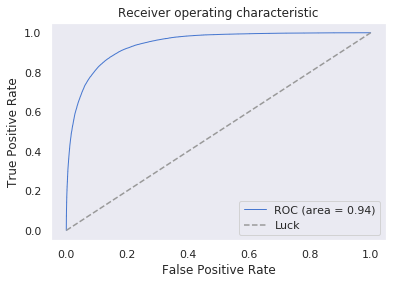

In [53]:
from sklearn.metrics import roc_curve, auc

decisions = clf.predict(X_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

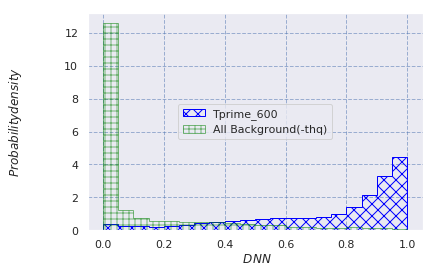

In [57]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict(X_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg = tTest[y_test==0]
tSig = tTest[y_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_600')
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background(-thq)')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot/''output_TPrime_ttgg.png')
plt.show()

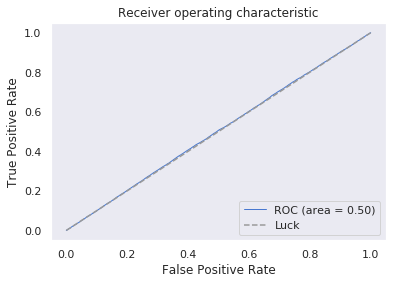

In [59]:
from sklearn.metrics import roc_curve, auc

decisions = clf.predict(df)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

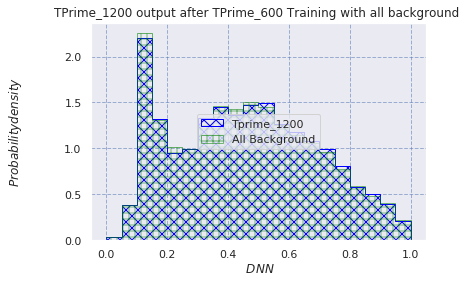

In [60]:
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict(df)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg = tTest[y_test==0]
tSig = tTest[y_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_1200')
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title('TPrime_1200 output after TPrime_600 Training with all background ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

# Other Way

In [61]:
X_1 = np.concatenate((signal_Tprime1200, backgr))
y_1 = np.concatenate((np.ones(signal_Tprime1200.shape[0]),
                    np.zeros(backgr.shape[0])))

In [62]:
y_1.shape

(265769,)

In [63]:
X_1_train,X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.33, random_state =5)


In [64]:
X_1_train.shape


(178065, 30)

In [65]:
X_1_test.shape

(87704, 30)

In [66]:
y_1_test.shape

(87704,)

In [67]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_1_test, y_1_test)

87704/87704 [==============================] - 6s 72us/step


In [68]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(X_1_test, y_1_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 71.40%


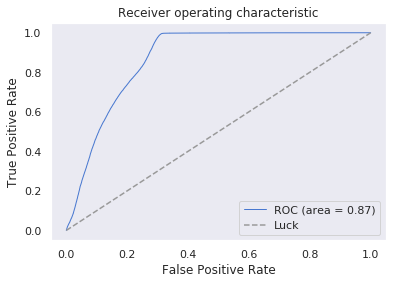

In [69]:
from sklearn.metrics import roc_curve, auc

decisions = clf.predict(X_1_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_1_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

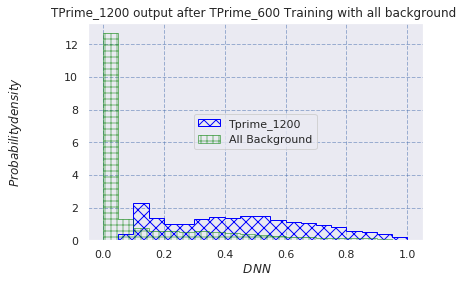

In [70]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict(X_1_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg = tTest[y_1_test==0]
tSig = tTest[y_1_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_1200')
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title('TPrime_1200 output after TPrime_600 Training with all background ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

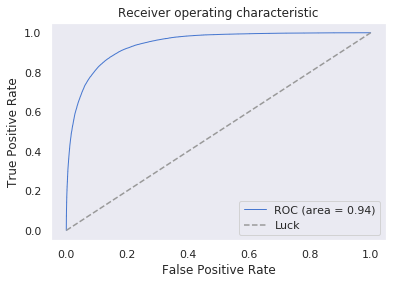

In [71]:
from sklearn.metrics import roc_curve, auc

decisions = clf.predict(X_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))


plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

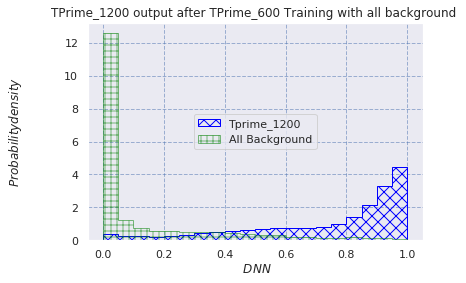

In [75]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict(X_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_1 = tTest[y_test==0]
tSig_1 = tTest[y_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_1, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_1200')
n, bins, patches = plt.hist(tBkg_1, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title('TPrime_1200 output after TPrime_600 Training with all background ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

In [73]:
from ROOT import TCanvas, TPad, TFormula, TF1, TPaveLabel, TH1F, TFile,TH1D
from ROOT import gROOT, gBenchmark

In [76]:
f = TFile("/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/ROOT_output/MyrootFile_after_training_Tprime_600_all_five_background_test_excpet_thq_with_TPrime1200.root", "RECREATE")
# tree = TTree("root",  )
# How do we get that to create and fill with the background and signal
h_bak = TH1D("background", "background", 100, 0,1)
h_sig = TH1D("signal", "signal", 100, 0, 1)
h_sum_all = TH1D("data_obs", "data_obs", 100, 0, 1)
for i in tBkg:
    h_bak.Fill(i)
for j in tSig:
    h_sig.Fill(j)
h_sum_all.Add(h_bak) 
h_sum_all.Add(h_sig)



f.Write()
f.Close()

Here, The output from the Ist method is not as good as the 2nd one.